# Task 3 : PRODIGY_DS_03

<i>Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.</i>

##  Importing the necessary libraries

In [ ]:
# ---------------------------------------------
# Import the required libraries
# ---------------------------------------------

# Data manipulation and analysis
import pandas as pd                   # For handling tabular data using DataFrames
import numpy as np                    # For numerical computations and array operations
import math                           # Import math for ceiling division

# Data visualization
import seaborn as sns                 # For creating advanced, aesthetic statistical plots
import matplotlib.pyplot as plt       # For basic 2D plotting (line, bar, scatter, etc.)
import plotly.express as px           # For interactive and dynamic visualizations

# Machine Learning (Model building)
from sklearn.tree import DecisionTreeClassifier   # For building Decision Tree classification models
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing sets
from sklearn import tree                            # For visualizing and exporting Decision Trees
from sklearn.tree import plot_tree  # Import plot_tree function


# Data preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # For encoding categorical variables

# Model evaluation
from sklearn.metrics import accuracy_score          # For calculating the accuracy of the model
from sklearn.metrics import roc_curve, auc          # For ROC curve plotting and AUC score calculation

# Display plots directly within the notebook
%matplotlib inline


## Reading the dataset

In [ ]:
# Import the Google Colab drive module
from google.colab import drive

# Mount Google Drive to the Colab environment
# This allows access to files stored in your Google Drive
# The files will be accessible under the path '/content/drive'
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# df = pd.read_csv(r"bank-additional-full.csv",delimiter=';')

In [ ]:
# Define the file path to the CSV dataset stored in Google Drive
# This path points to 'bank-additional-full.csv' inside the user's 'New folder' in Google Drive
file_path = '/content/drive/MyDrive/WIP PRODIGY/New folder/bank-additional-full.csv'


In [ ]:
# Read the CSV file from Google Drive into a pandas DataFrame
# 'delimiter=";"' is used because this dataset uses semicolons (;) instead of commas
df = pd.read_csv(file_path, delimiter=';')


In [ ]:
# Check the first few rows to verify the data loaded correctly
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## About the dataset:

**The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).**


| Variable Name | Role    | Type        | Demographic      | Description                                                                                                                                       | Units |
|---------------|---------|-------------|------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|-------|
| age           | Feature | Integer     | Age              |                                                                                                                                                   |       |
| job           | Feature | Categorical | Occupation       | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |       |
| marital       | Feature | Categorical | Marital Status   | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                  |       |
| education     | Feature | Categorical | Education Level  | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                      |       |
| default       | Feature | Binary      |                  | has credit in default?                                                                                                                             |       |
| balance       | Feature | Integer     |                  | average yearly balance                                                                                                                             | euros |
| housing       | Feature | Binary      |                  | has housing loan?                                                                                                                                  |       |
| loan          | Feature | Binary      |                  | has personal loan?                                                                                                                                 |       |
| contact       | Feature | Categorical |                  | contact communication type (categorical: 'cellular','telephone')                                                                                   |       |
| day_of_week   | Feature | Date        |                  | last contact day of the week                                                                                                                       |       |
| month         | Feature | Date        |                  | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                   |       |
| duration      | Feature | Integer     |                  | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |       |
| campaign      | Feature | Integer     |                  | number of contacts performed during this campaign and for this client (numeric, includes last contact)                                              |       |
| pdays         | Feature | Integer     |                  | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)  |       |
| previous      | Feature | Integer     |                  | number of contacts performed before this campaign and for this client                                                                              |       |
| poutcome      | Feature | Categorical |                  | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                                                        |       |
| y             | Target  | Binary      |                  | has the client subscribed a term deposit?                                                                                                          |       |


In [ ]:
# Rename the target column 'y' to a more descriptive name 'subscribed_deposit'
# inplace=True ensures the change is applied directly to the original DataFrame
df.rename(columns={'y': 'subscribed_deposit'}, inplace=True)


## Details about the dataset

In [ ]:
# Get the dimensions of the DataFrame
# Returns a tuple: (number_of_rows, number_of_columns)
df.shape


(41188, 21)

In [ ]:
# Show all column names in the DataFrame
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed_deposit'],
      dtype='object')

In [ ]:
# Display summary of DataFrame: column names, data types, and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 41188 non-null  int64  
 1   job                 41188 non-null  object 
 2   marital             41188 non-null  object 
 3   education           41188 non-null  object 
 4   default             41188 non-null  object 
 5   housing             41188 non-null  object 
 6   loan                41188 non-null  object 
 7   contact             41188 non-null  object 
 8   month               41188 non-null  object 
 9   day_of_week         41188 non-null  object 
 10  duration            41188 non-null  int64  
 11  campaign            41188 non-null  int64  
 12  pdays               41188 non-null  int64  
 13  previous            41188 non-null  int64  
 14  poutcome            41188 non-null  object 
 15  emp.var.rate        41188 non-null  float64
 16  cons

In [ ]:
# Show statistical summary (count, mean, std, min, max, quartiles) for numeric columns
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Checking for null/missing values in the dataset

In [ ]:
# Count the number of missing values in each column
print(df.isnull().sum())


age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
subscribed_deposit    0
dtype: int64


`Observation & Inference:`
- No missing values present

## Checking for duplicate values in the dataset

In [ ]:
# Count the number of duplicate rows in the DataFrame
print(df.duplicated().sum())


12


In [ ]:
# Remove duplicate rows from the DataFrame in place
df.drop_duplicates(inplace=True)


In [ ]:
# Verify that all duplicate rows have been removed
print(df.duplicated().sum())


0


So, All the duplicate values are removed.

## Visualizing numerical columns using histogram

In [ ]:
# Select column names with object (categorical) data types
df_obj = df.select_dtypes(include='object').columns

# Select column names with numeric data types
df_num = df.select_dtypes(exclude='object').columns


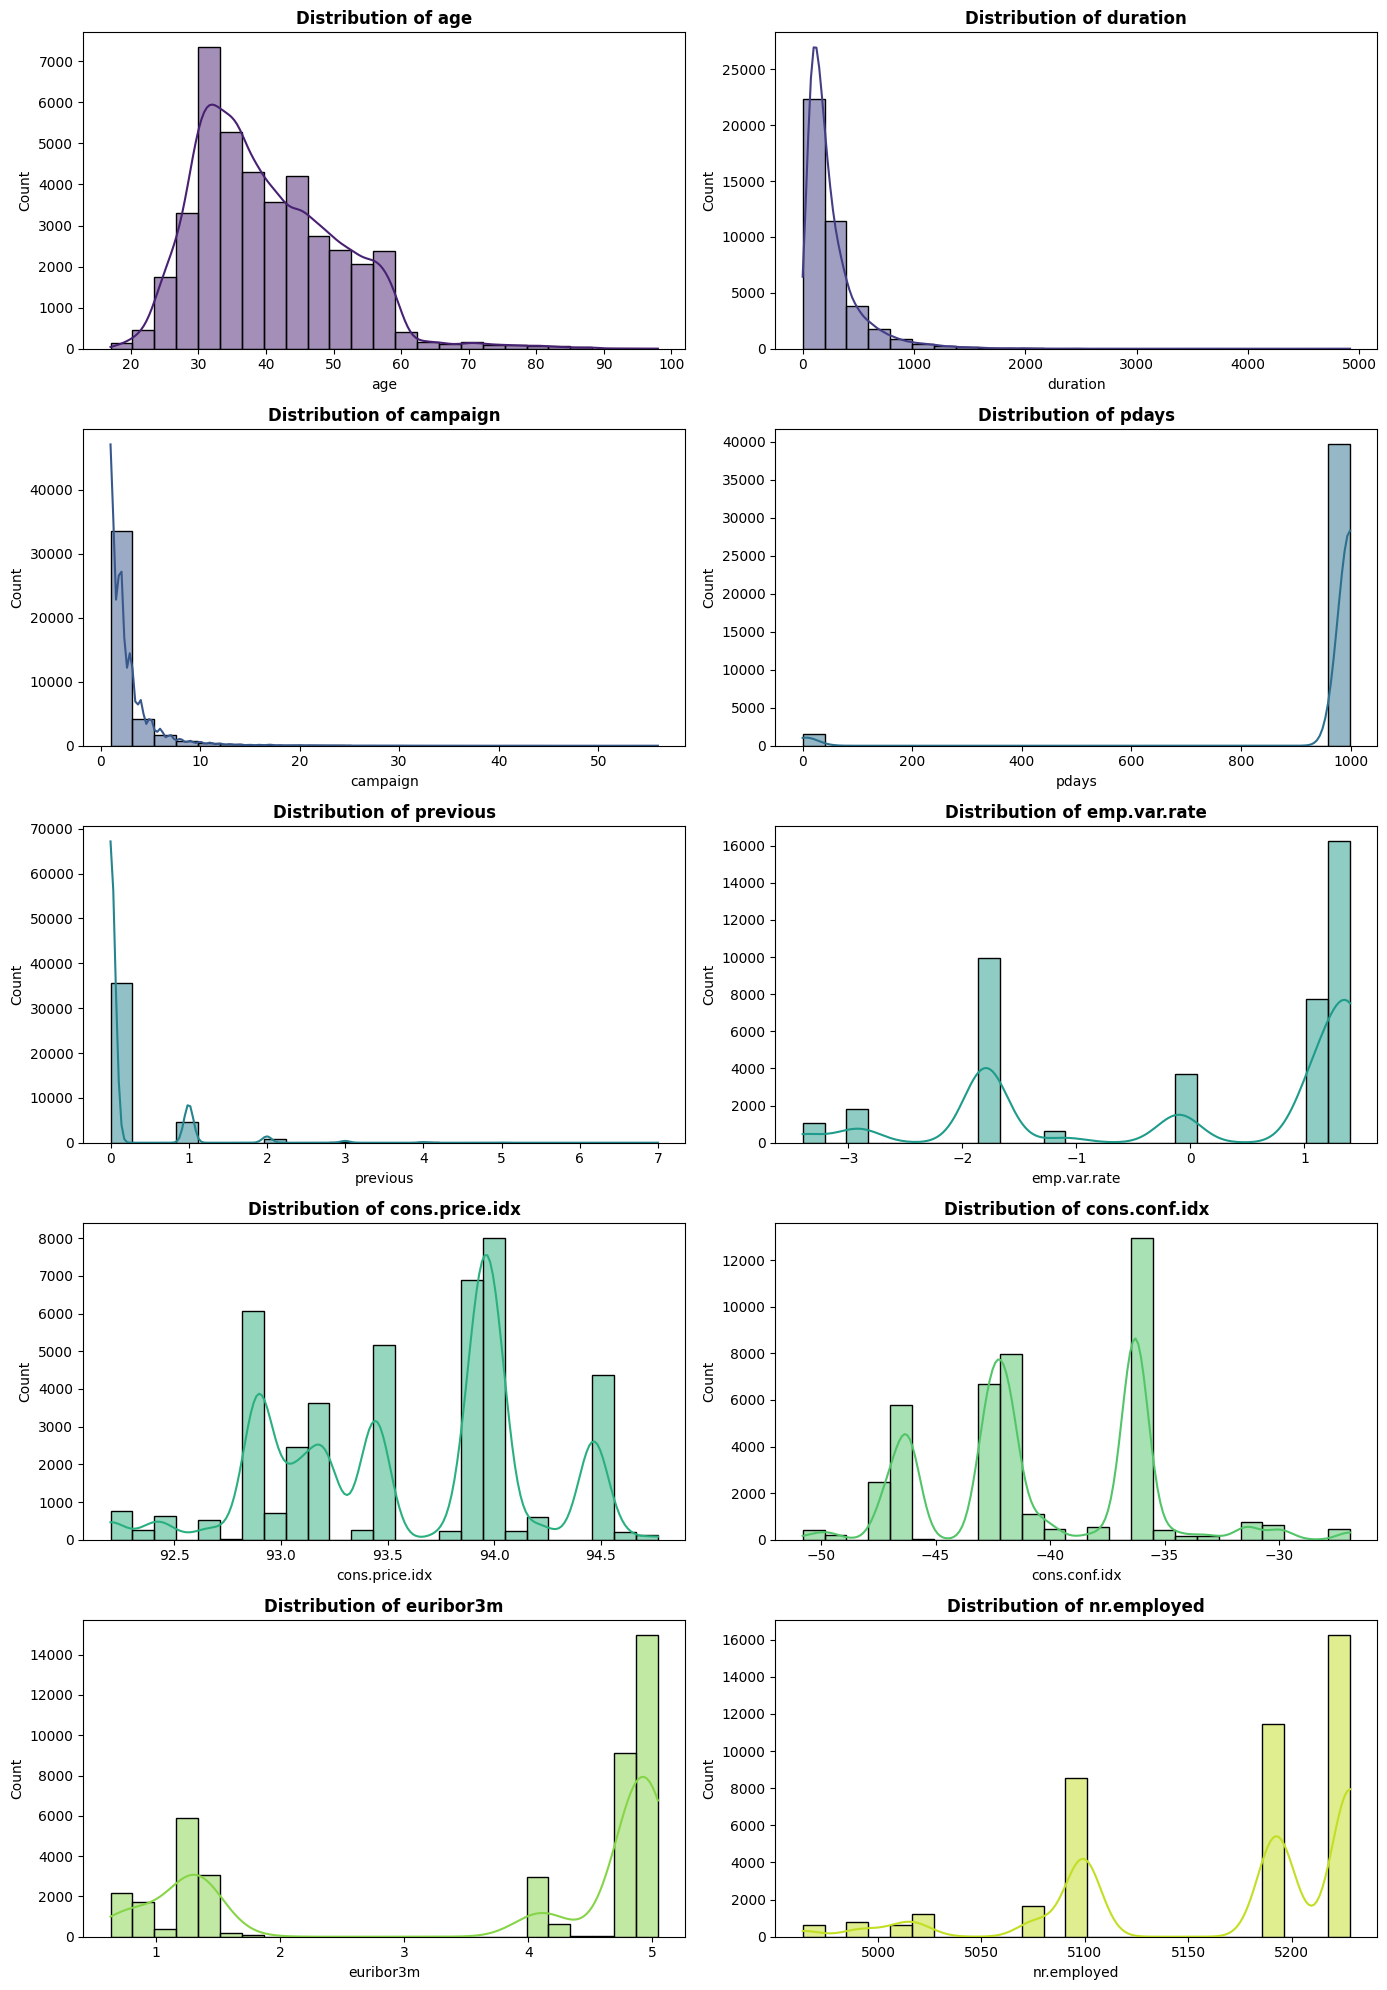

In [ ]:
# ---------------------------------------------
# Plot all numeric feature distributions using Seaborn
# Each subplot gets a distinct color from the 'viridis' palette
# ---------------------------------------------

# Create a color palette with 'viridis' having as many colors as numeric columns
palette = sns.color_palette("viridis", len(df_num))

# Calculate number of subplot rows (2 plots per row)
rows = (len(df_num) + 1) // 2

# Create subplot grid for displaying multiple histograms
fig, axes = plt.subplots(rows, 2, figsize=(14, 4 * rows))

# Flatten axes array for easier indexing during iteration
axes = axes.flatten()

# Iterate through all numeric features and plot histograms
for i, feature in enumerate(df_num):
    sns.histplot(
        data=df,
        x=feature,
        bins=25,          # Number of histogram bins
        kde=True,         # Add kernel density estimate curve
        color=palette[i], # Assign unique color to each plot
        ax=axes[i]        # Specify subplot axis
    )

    # Add plot title and axis labels
    axes[i].set_title(f'Distribution of {feature}', fontsize=12, weight='bold')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)

# Hide extra subplots if number of features is odd
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap between subplots
plt.tight_layout()

# Display all histograms
plt.show()


### Observations :-

- **Age :**
  
   Right-skewed, peak in 30-40 bin (count ~7,000), range 18-95, mean 40.94, median 39, std 10.62, skew 0.68, kurtosis 0.32.

- **Duration :**
  
  Highly right-skewed, peak in 0-200s (count ~25,000), range 0-4,918s, mean 258, median 180, std 258, skew 3.14, kurtosis 18.15.

- **Campaign :**

  Right-skewed, peak at 1-2 contacts (count ~40,000), range 1-63, mean 2.76, median 2, std 3.1, skew 4.9, kurtosis 39.25.

- **Pdays :**
  
   Spike at 0 (remapped from 999/-1, count ~35,000 or 81.7%), tail to ~1,000, range -1-871 (original), mean 40.2, median -1, std 100, skew 2.62, kurtosis 6.94.

- **Previous :**

   Spike at 0 (count ~35,000 or 81.7%), tail to 7+, range 0-275, mean ~0.17 (inferred), median 0, skew ~41.85.

- **Emp.var.rate :**
  
   Multimodal, major peaks at 1.4 (count ~16,000) and -1.8 (count ~14,000), range -3.4 to 1.4.

- **Cons.price.idx :**

   Multimodal, peaks at ~93.1 (count ~7,000) and ~93.7 (count ~6,000), range 92.2-94.8.

- **Cons.conf.idx :**
  
   Multimodal, peaks at -42.7 (count ~10,000) and -40.8 (count ~8,000), range -50.8 to -26.9.

- **Euribor3m :**

   Multimodal, peaks at ~4.9 (count ~14,000) and ~1.3 (count ~10,000), range 0.63-5.05.

- **Nr.employed :**
  
   Multimodal, peaks at 5,228 (count ~16,000) and 5,091 (count ~12,000), range 4,964-5,228.

### Insights :-

- **Demographic and Behavioral Patterns :**

   Age skew targets mid-career adults (30-50), with outliers in seniors; short durations/few campaigns suggest inefficient or aborted calls, correlating with low subscriptions—focus on engagement strategies for longer interactions (post-analysis only).

- **Campaign History :**
  
   Pdays/previous dominance at 0 indicates mostly new leads (81.7%), with weak positive correlation to success; remapping highlights need for handling special values in preprocessing to avoid bias.

- **Economic Indicators :**

   Multimodal distributions reflect discrete economic periods (e.g., 2008 crisis peaks), with negative correlations (e.g., euribor3m -0.31 to subscriptions)—time campaigns in low-rate, high-confidence eras for better yields.

- **Modeling Considerations :**

   High skews (e.g., duration kurtosis 18) and multimodality necessitate log-transformations or binning; outliers (e.g., campaign >6) warrant capping; imbalance amplifies need for resampling to predict rare positives effectively.

## Visualizing categorical columns using bar graphs


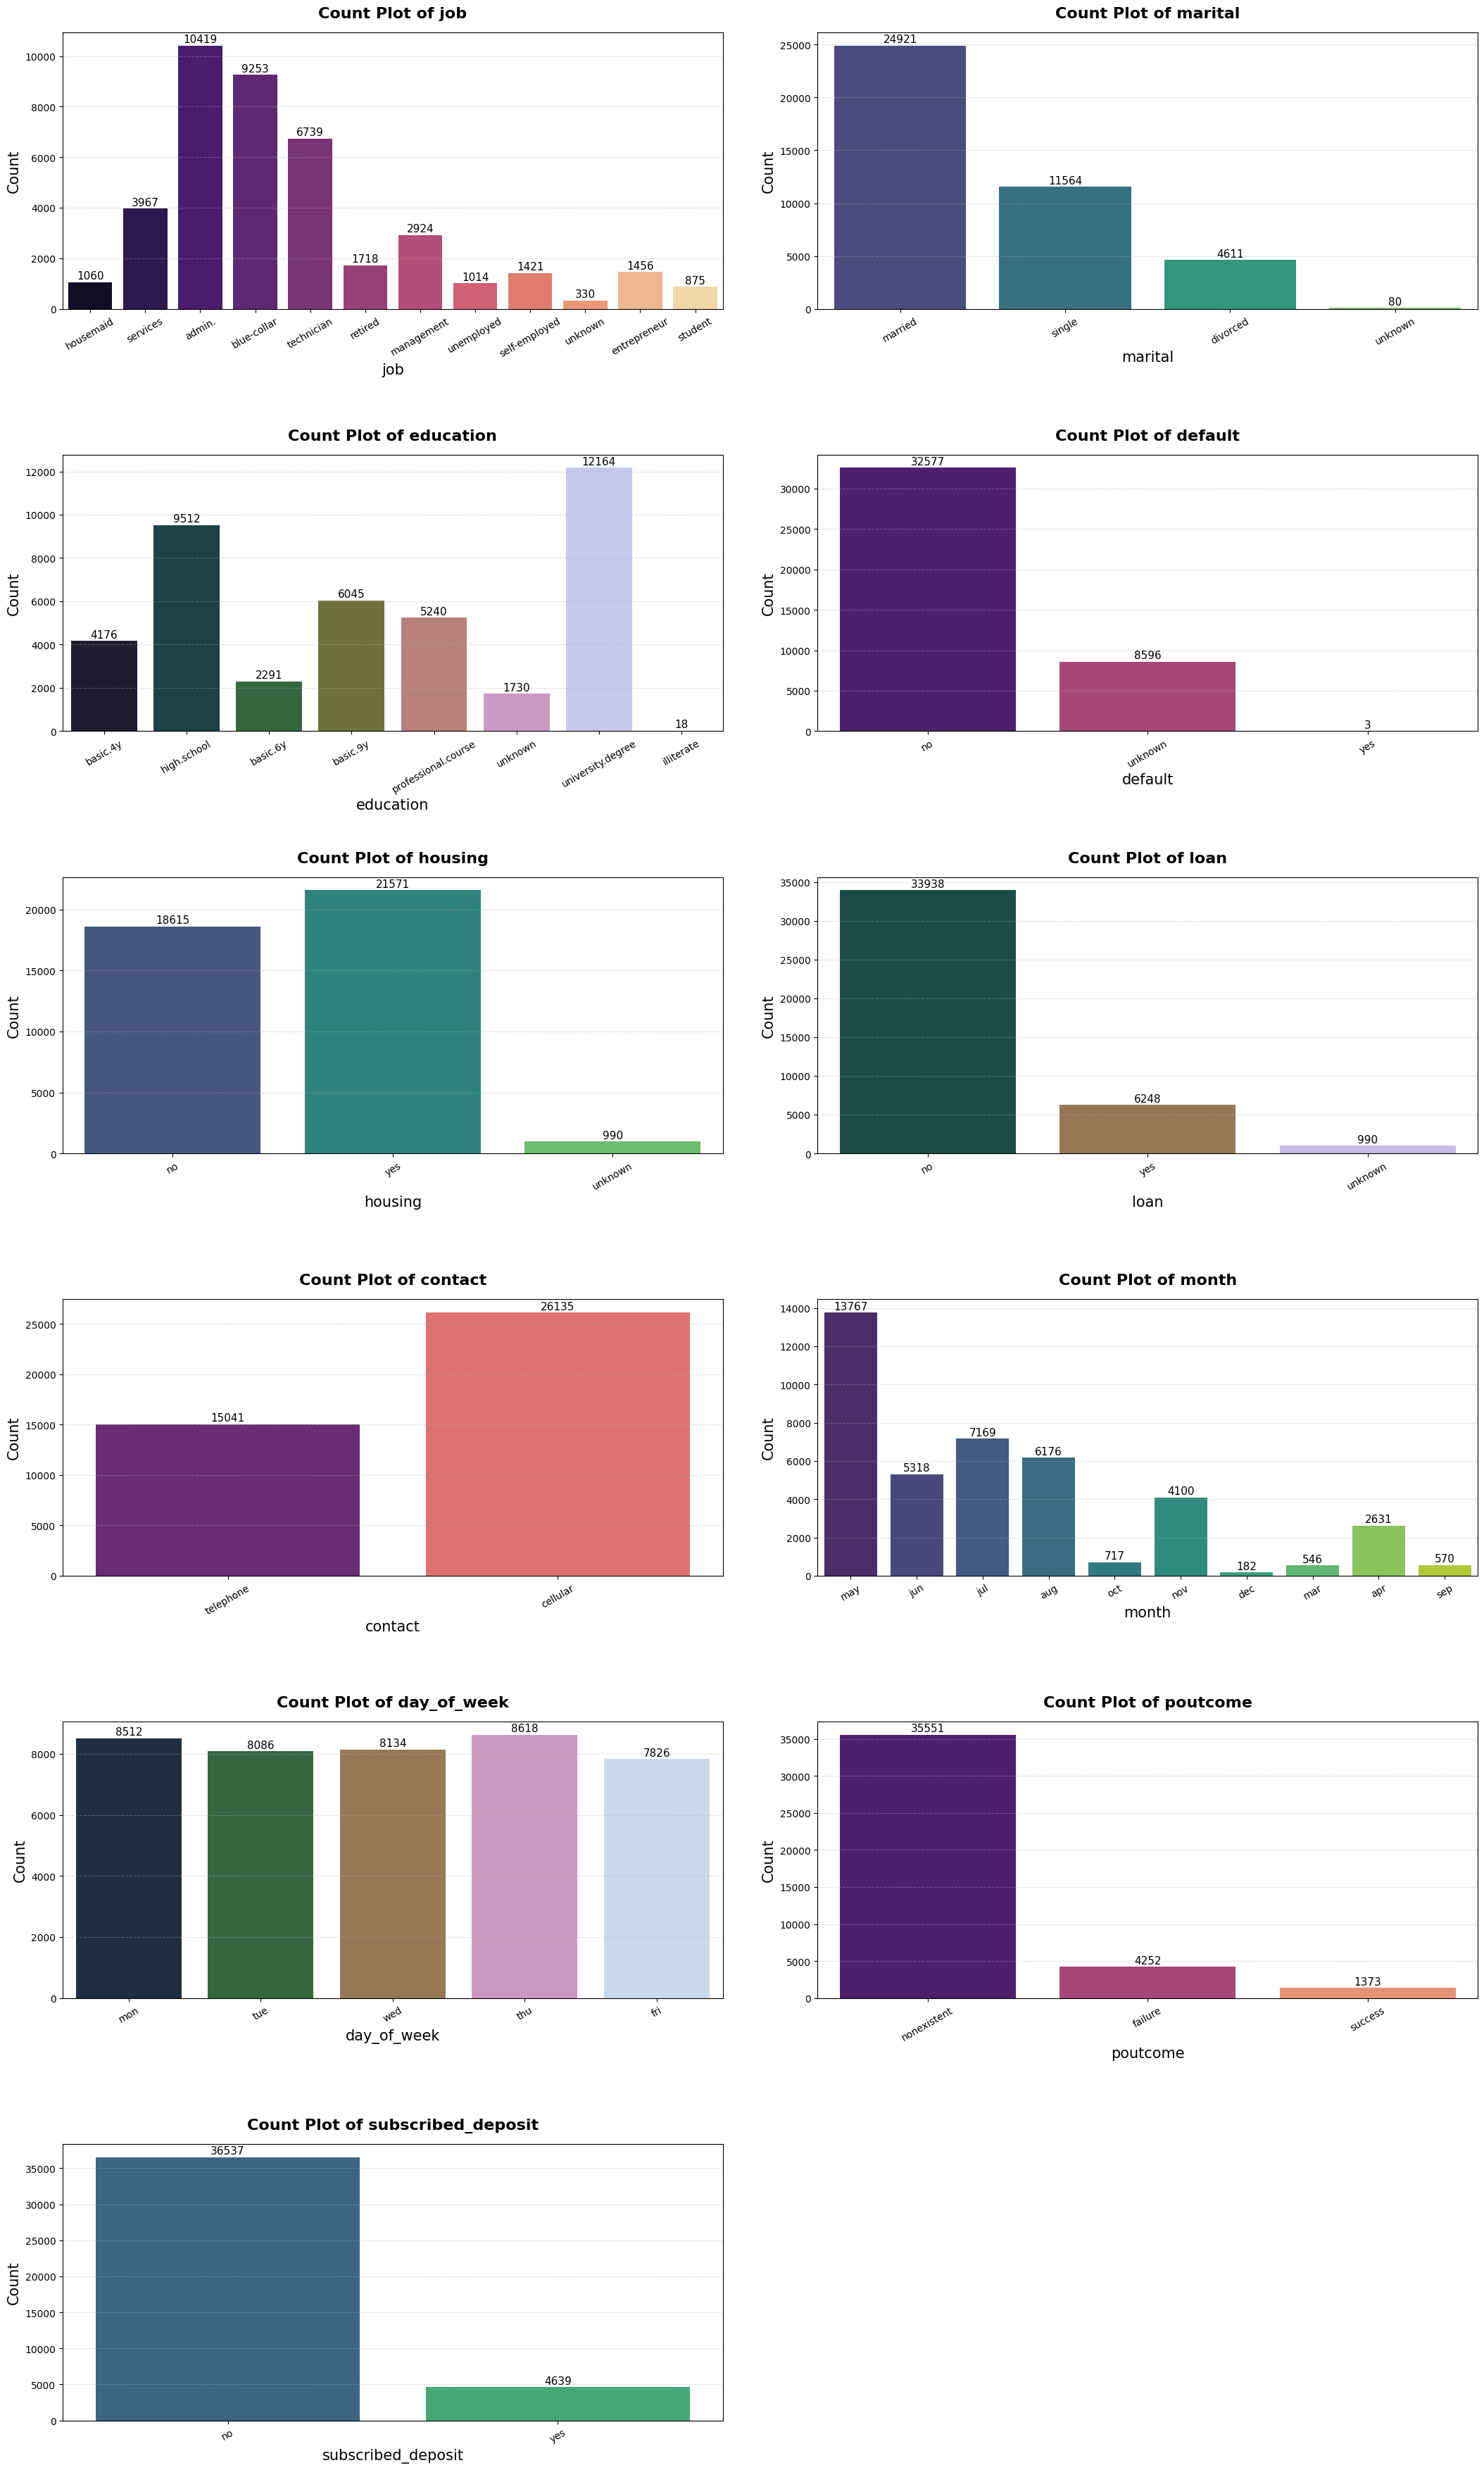

In [ ]:
# --------------------------------------------
# Count plots for all categorical (object) features
# with different color palettes and count labels
# --------------------------------------------

palettes = ['magma', 'viridis', 'cubehelix']  # Multiple palettes for variation

n_features = len(df_obj)
n_cols = 2  # Number of charts per row
n_rows = math.ceil(n_features / n_cols)

# Create large figure for better readability
fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(22, n_rows * 6)
)

axes = axes.flatten()

for i, feature in enumerate(df_obj):
    ax = axes[i]
    palette_name = palettes[i % len(palettes)]  # Cycle through color palettes

    # Create count plot with unique color for each category
    sns.countplot(
        data=df,
        x=feature,
        hue=feature,  # Ensures distinct color for each category
        legend=False,
        palette=sns.color_palette(palette_name, n_colors=df[feature].nunique()),
        ax=ax
    )

    # Add count labels above each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=11, label_type='edge', padding=1)

    # Add titles and labels
    ax.set_title(f"Count Plot of {feature}", fontsize=16, weight='bold', pad=15)
    ax.set_xlabel(feature, fontsize=15)
    ax.set_ylabel('Count', fontsize=15)
    ax.tick_params(axis='x', rotation=30)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

# Remove any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout(pad=4)
plt.show()


### Observations :-

- **Demographics :**

   Most clients are employed as "admin" (10,422), married (24,928), hold university degrees (12,168), have no credit defaults (32,588), take housing loans (21,576), and do not have personal loans (33,950).

- **Campaign Execution :**
   The majority are contacted via cellular (26,144), in May (13,769), on Thursdays (8,623), with a uniform weekday distribution.

- **Outcomes :**
   Most prior campaign results are "nonexistent" (35,563), and the target outcome shows most clients did not subscribe to term deposits (36,548, 88.7%).

### Insights :-

- **Targeted Demographic Focus :**
  
  - The dominance of admin jobs, married individuals, and university-educated clients with no defaults suggests the bank targets stable, middle-class professionals with low credit risk.
  
  - This focus (e.g., 47% in admin/blue-collar jobs, 53% with secondary/higher education) may exclude diverse segments like students (875) or unemployed (1,014), limiting market reach. The near-even housing loan split (52% yes) and high no-loan rate (82%) indicate a preference for clients with manageable financial commitments, potentially biasing models toward this profile.


- **Campaign Strategy Efficiency :**

  - The heavy reliance on cellular contact (63.5%) and May campaigns (33% of contacts) reflects a strategic lean toward mobile outreach and spring/summer activity, possibly due to higher engagement during this period.
  - Thursday peaks suggest optimal weekday timing, but the uniform weekday spread and low winter activity (e.g., December at 182) highlight missed opportunities in off-seasons or weekends, warranting A/B testing for broader coverage.
- **Outcome Challenges and Opportunities :**

  - The "nonexistent" prior outcome (86%) indicates a focus on new leads, while the 11.3% subscription rate (4,640) reveals a typical low-conversion marketing scenario.
  - This imbalance, combined with the demographic skew, suggests predictive models may favor "no" predictions unless adjusted (e.g., oversampling).
  
  - Cross-variable insights—e.g., educated/married clients with no loans might subscribe more—offer potential for targeted retargeting of prior successes or exploring economic factors (e.g., 2008 crisis context) to boost conversions.

## checking for outliers

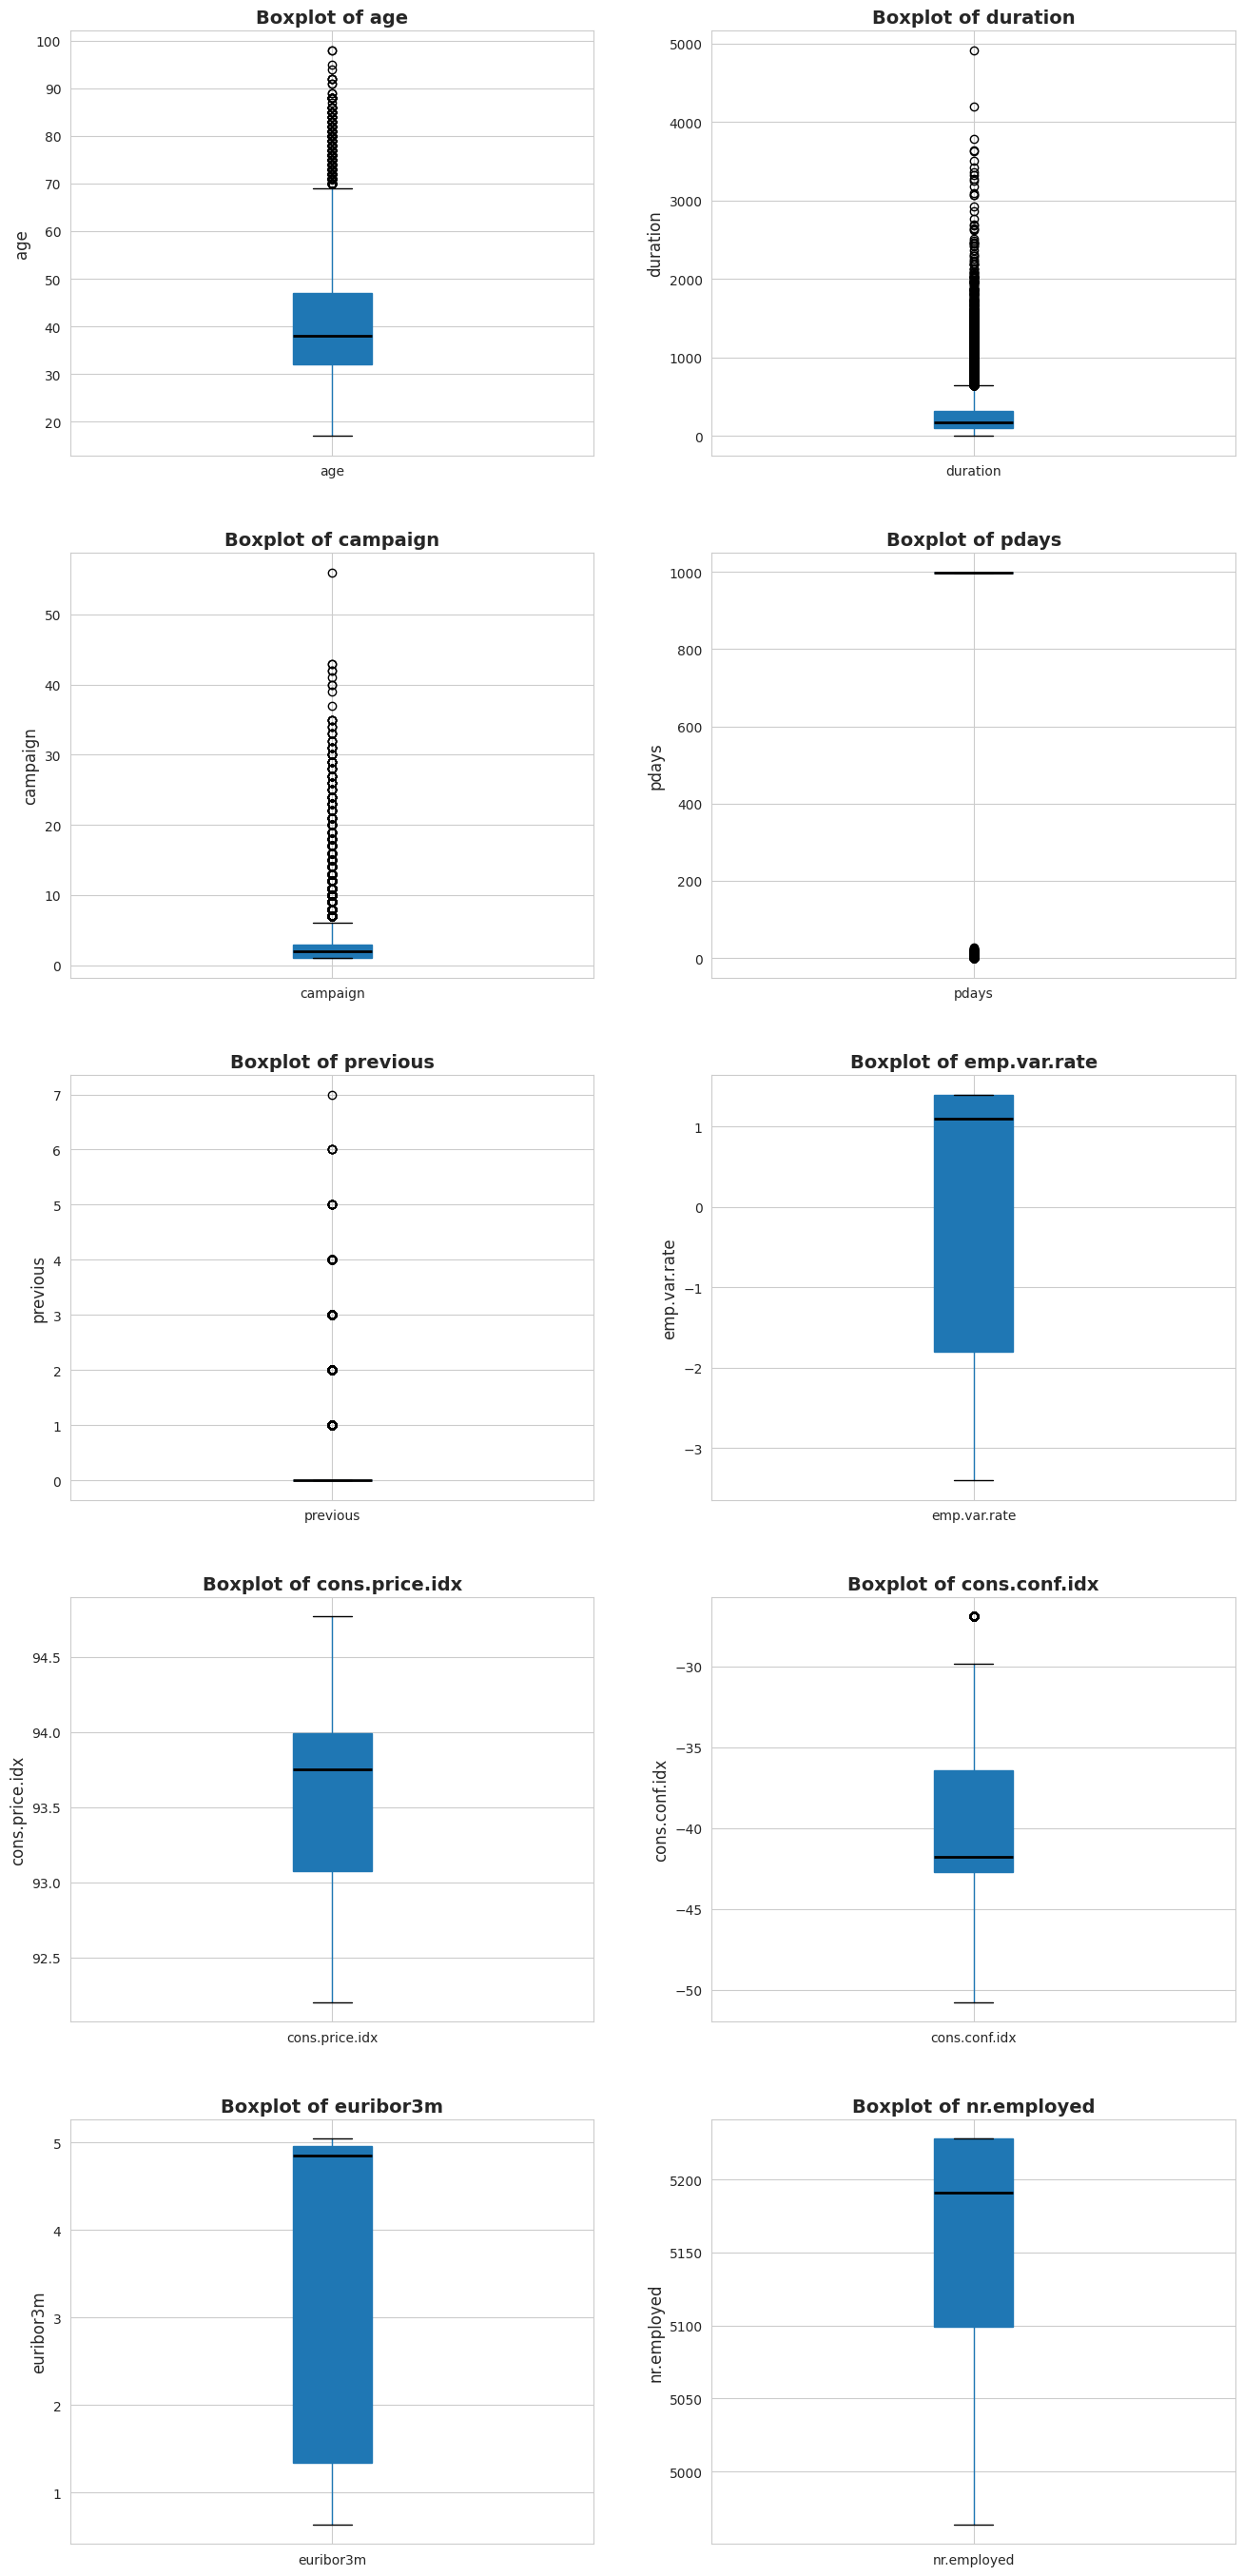

In [ ]:
# Set Seaborn style for better aesthetics and gridlines
sns.set_style("whitegrid")

# Create a grid of subplots: 5 rows x 2 columns, with large figure size
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 28))
axes = axes.flatten()  # Flatten 2D array of axes for easy iteration

# Loop through all numeric features and plot individual boxplots
for i, col in enumerate(df_num):
    df.boxplot(
        column=col,
        ax=axes[i],
        patch_artist=True,                       # Fill boxes with color
        grid=True,                               # Show gridlines
        medianprops=dict(color='black', linewidth=2)  # Show median as black line
    )

    # Set subplot title and axis labels
    axes[i].set_title(f'Boxplot of {col}', fontsize=14, weight='bold')
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].tick_params(axis='x')

# Remove any unused subplots (if numeric columns < 10)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots for a clean layout
plt.tight_layout(pad=4.0)
plt.show()


### Observation :-

- **Age :** Median 38, range 18-88, outliers >70.
- **Duration :** Median 180s, range 0-4,918s, outliers >500s.
- **Campaign :** Median 2, range 1-63, outliers >6.
- **Pdays :** Median 0 (meaning not contacted), range -1-871, outlier >1,000.
- **Previous :** Median 0, range 0-275, outliers >7.
- **Emp.var.rate :** Median 1.2, range -3.4 to 1.4, outliers.
- **Cons.price.idx :** Median 93.75, narrow range 90.47-96.65, minor outliers.
- **Cons.conf.idx :** Median -39.8, range -55.5 to 28.7, outliers.
- **Euribor3m :** Median 4.86, narrow range 0.63-5.04, minor outliers.
- **Nr.employed :** Median 5,191, narrow range 4,963.6-5,228.1, minor outliers.

## Outlier treatment

In [ ]:
# ----------------------------------------
# Remove outliers from selected numeric columns using the IQR method
# ----------------------------------------

columns = ['age', 'campaign', 'duration']  # Columns to check for outliers

for column in columns:
    # Compute Q1 (25th percentile) and Q3 (75th percentile)
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    # Compute Interquartile Range (IQR)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter out outliers in the current column
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# check remaining data
print("Data shape after removing outliers:", df.shape)


Data shape after removing outliers: (35550, 21)


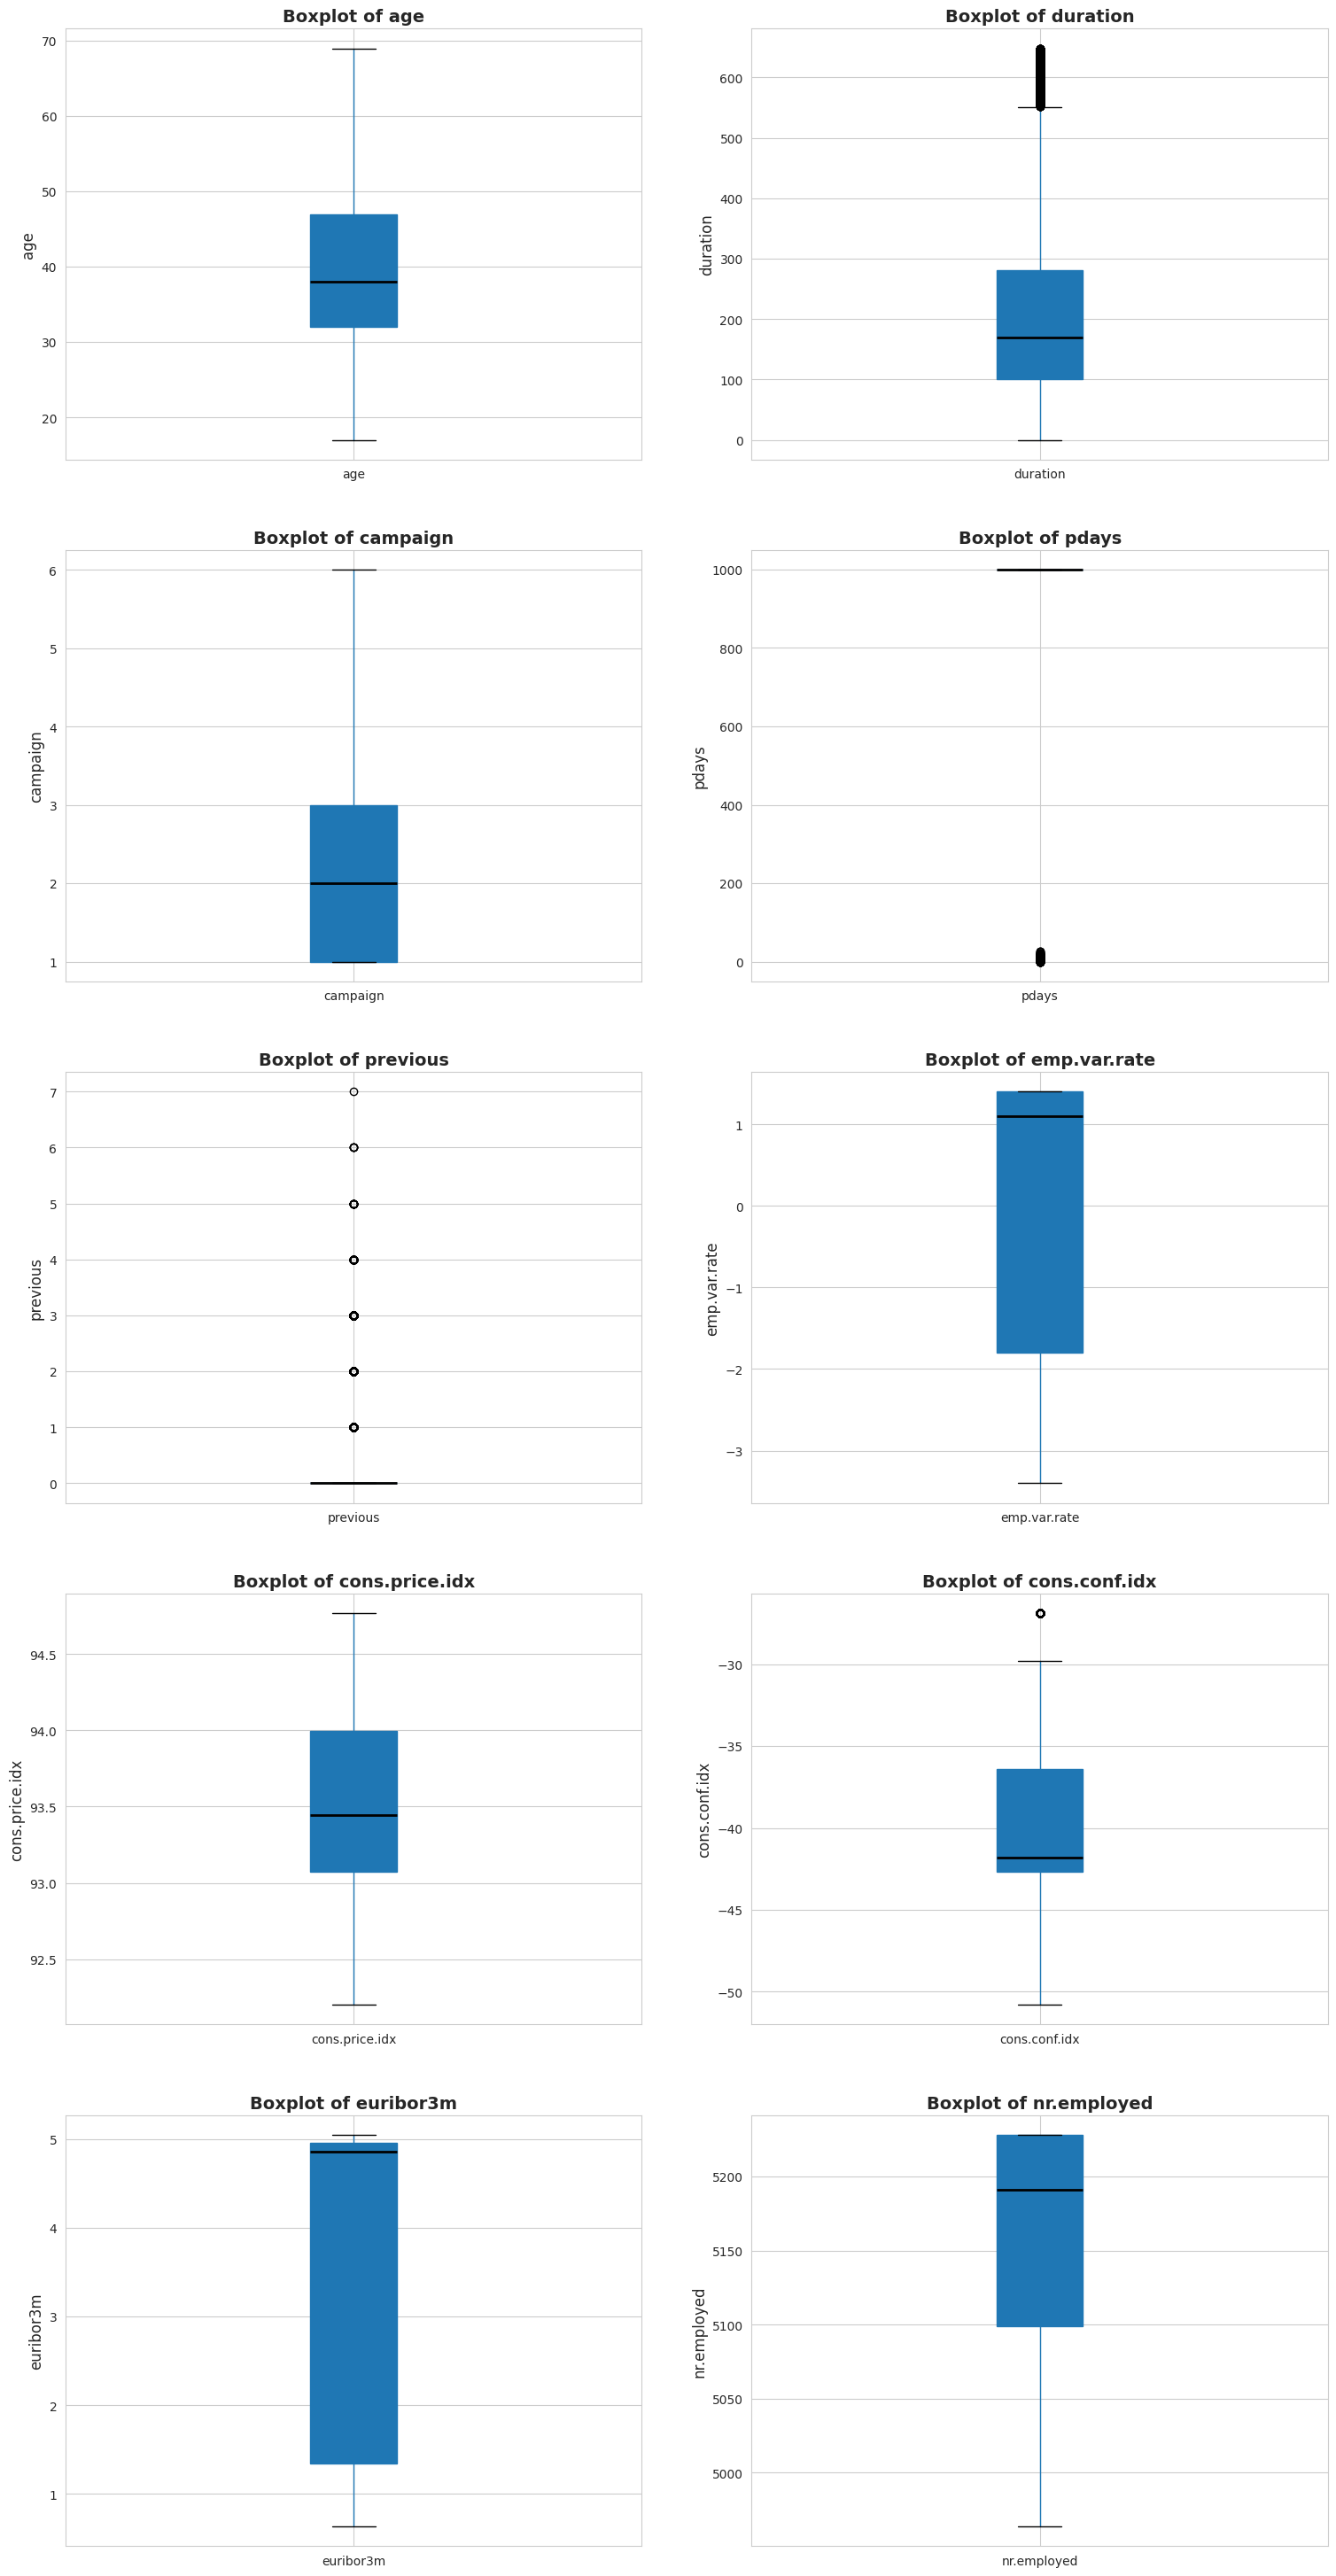

In [ ]:
# Set Seaborn style for better aesthetics and gridlines
sns.set_style("whitegrid")

# Create a grid of subplots for all numeric columns
# 5 rows x 2 columns layout with large figure size for readability
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 30))
axes = axes.flatten()  # Flatten 2D array of axes for easy iteration

# Loop through numeric columns and plot individual boxplots
for i, col in enumerate(df_num):
    df.boxplot(
        column=col,
        ax=axes[i],
        patch_artist=True,                       # Fill boxes with color
        grid=True,                               # Show horizontal gridlines
        medianprops=dict(color='black', linewidth=2)  # Median line as thick black line
    )

    # Set subplot title and y-axis label
    axes[i].set_title(f'Boxplot of {col}', fontsize=14, weight='bold')
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].tick_params(axis='x')  # Customize x-axis ticks if needed

# Remove any unused subplots (if numeric columns < 10)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots for a clean layout
plt.tight_layout(pad=4.0)
plt.show()


## Checking for correlation using heatmap

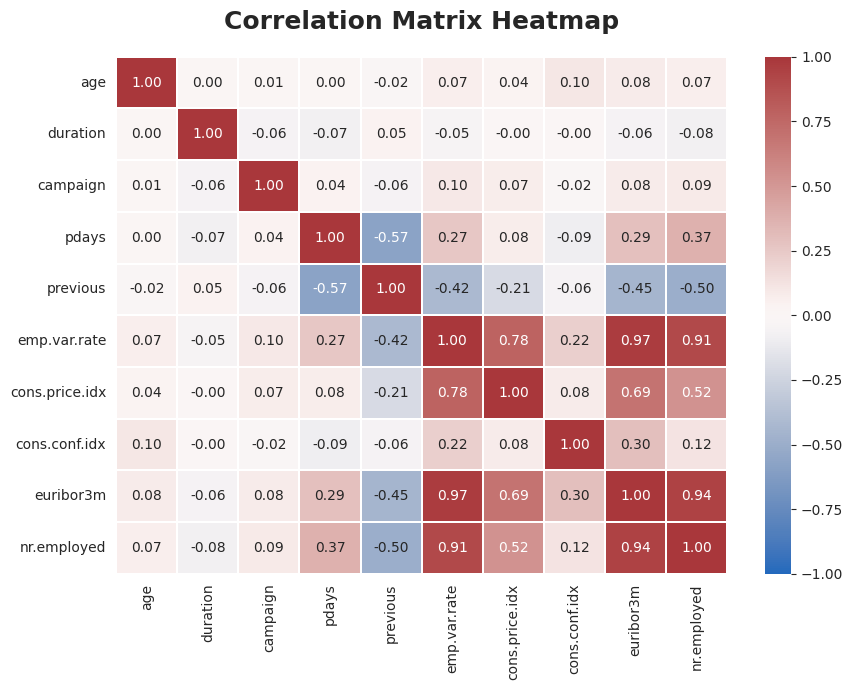

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Set Seaborn style for better visuals
sns.set_style("white")

# Create a larger figure for readability
plt.figure(figsize=(9, 7))

# Create heatmap with a visually appealing palette
sns.heatmap(
    numerical_df.corr(),       # Correlation matrix
    annot=True,                # Show correlation values
    fmt=".2f",                 # Round to 2 decimals
    cmap='vlag',              # Visually appealing color palette
    vmin=-1, vmax=1,           # Correlation scale from -1 to 1
    center=0,                  # Center the color map at 0
    linewidths=0.01,              # Add lines between cells for clarity
    linecolor='white'          # Lines color
)

plt.title('Correlation Matrix Heatmap', fontsize=18, weight='bold', pad=20)
plt.xticks(rotation=90, ha = 'center')  # Rotate x-axis labels
plt.yticks(rotation=0, va ='center')   # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()



### **Valuable Insights from Correlation Matrix Heatmap :-**

- **Age :**

  Weak correlations (0.00 to 0.10) with all variables suggest age has minimal impact on campaign outcomes or economic indicators, indicating broad demographic targeting across age groups.

- **Duration :**

  Negligible correlations (e.g., -0.06 with campaign, -0.08 with nr.employed) imply call length is not strongly tied to campaign effort or employment levels, but its range (0-4,918s) from boxplots suggests outliers may skew analysis—focus on filtering extreme durations.

- **Campaign :**

  Moderate positive correlation with pdays (0.04) and nr.employed (0.09) indicates more contacts are linked to longer intervals since last contact and higher employment, but the weak negative with previous (-0.06) suggests repeated contacts don’t build on prior engagement—optimize contact frequency.

- **Pdays :**

  Strong negative correlation with previous (-0.57) shows clients contacted earlier are less likely to have prior campaigns, while positive ties with emp.var.rate (0.27) and nr.employed (0.37) suggest economic conditions influence contact timing—prioritize high-employment periods.

- **Previous :**

  Strong negative correlations with pdays (-0.57) and nr.employed (-0.50) indicate prior campaign success is less common during high employment or long intervals—target clients with recent, successful prior contacts.

- **Emp.var.rate :**

  High positive correlations with cons.price.idx (0.78), euribor3m (0.97), and nr.employed (0.91) reflect economic coherence (e.g., employment variation aligns with interest rates and consumer confidence), but negative with previous (-0.42) suggests economic downturns reduce prior success—adjust strategies during economic shifts.

- **Cons.price.idx :**
  
  Strong positive correlation with emp.var.rate (0.78) and euribor3m (0.69) indicates consumer price index rises with employment and interest rates—monitor inflation trends for campaign timing.

- **Cons.conf.idx :**

  Moderate positive with emp.var.rate (0.22) and weak with euribor3m (0.30) suggest consumer confidence is loosely tied to economic indicators—consider sentiment analysis to boost engagement.

- **Euribor3m :**
  
  Very high correlation with nr.employed (0.94) and emp.var.rate (0.97) highlights interest rate sensitivity to employment—align campaigns with low-rate periods for better response.

- **Nr.employed :**
  
  Strong positive correlations with emp.var.rate (0.91), euribor3m (0.94), and cons.price.idx (0.52) indicate employment drives economic variables—target regions with stable or growing jobs.

In [ ]:
# -----------------------------------------
# High-correlation features
# These columns are identified as having strong correlation with the target variable
# or among themselves, and may be important for modeling or further analysis
# -----------------------------------------
high_corr_cols = ['emp.var.rate', 'euribor3m', 'nr.employed']


In [ ]:
# ---------------------------------------------
# Create a copy of the original dataframe to avoid modifying it directly
# ---------------------------------------------
df1 = df.copy()

# ---------------------------------------------
# Remove highly correlated columns identified earlier
# These columns are dropped to prevent multicollinearity in modeling
# ---------------------------------------------
df1 = df1.drop(columns=high_corr_cols)  # axis=1 is implied when using 'columns'

# Optional: check new columns and shape after dropping
print("Columns after removing highly correlated features:\n", df1.columns)
print("\nShape before dropping:", df.shape, " -> Shape after dropping:", df1.shape)


Columns after removing highly correlated features:
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx',
       'subscribed_deposit'],
      dtype='object')

Shape before dropping: (35550, 21)  -> Shape after dropping: (35550, 18)


## showing dimensions of the updated dataset

In [ ]:
# Check the shape of the new dataframe after removing highly correlated columns
df1.shape

(35550, 18)

## Conversion of categorical columns into numerical columns using label encoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# ---------------------------------------------
# Initialize LabelEncoder
# ---------------------------------------------
le = LabelEncoder()

# ---------------------------------------------
# Encode all columns in df1 using LabelEncoder
# Note: LabelEncoder works best for categorical columns.
# Applying it directly to numeric columns will also transform them.
# For mixed datasets, it's safer to encode only categorical columns.
# ---------------------------------------------
df_encoded = df1.apply(le.fit_transform)

# Display the encoded dataframe
df_encoded


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,subscribed_deposit
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,18,16,0
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,18,16,0
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,18,16,0
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,18,16,0
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,18,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,20,0,1,6,0,2,0,0,7,0,281,0,26,0,1,25,0,1
41182,12,10,2,0,0,2,0,0,7,0,112,0,9,1,2,25,0,0
41184,29,1,1,5,0,0,0,0,7,0,383,0,26,0,1,25,0,0
41185,39,5,1,6,0,2,0,0,7,0,189,1,26,0,1,25,0,0


## Checking the target variable

In [ ]:
# Calculate the percentage distribution of the target variable 'subscribed_deposit'
# value_counts(normalize=True) gives proportions, multiplying by 100 converts to percentage
df_encoded['subscribed_deposit'].value_counts(normalize=True) * 100


,proportion
subscribed_deposit,
0,91.887482
1,8.112518


In [ ]:
# ---------------------------------------------
# Define independent (feature) variables
# Select all columns except the last one as features
# ---------------------------------------------
x = df_encoded.iloc[:, :-1]

# ---------------------------------------------
# Define the target variable
# Select the last column as the target
# ---------------------------------------------
y = df_encoded.iloc[:, -1]

# Optional: check shapes
print("Features shape:", x.shape)
print("Target shape:", y.shape)


Features shape: (35550, 17)
Target shape: (35550,)


## Splitting the dataset into train and test datasets

In [ ]:
# --------------------------------------------------------
# Split the dataset into training and testing sets
# --------------------------------------------------------

from sklearn.model_selection import train_test_split

# Split data: 70% for training and 30% for testing
# random_state ensures reproducibility of results
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,
    random_state=1,
    stratify=y  # maintain class balance in both sets (recommended for classification)
)

# Display the shape of the resulting datasets
print(f"Training features shape: {x_train.shape}")
print(f"Testing features shape: {x_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training features shape: (24885, 17)
Testing features shape: (10665, 17)
Training target shape: (24885,)
Testing target shape: (10665,)


## Decision Tree classifier

### using 'gini' criterion

In [ ]:
# Initialize the Decision Tree Classifier
# - criterion='gini' → uses Gini impurity to measure split quality
# - max_depth=5 → limits tree depth to control overfitting
# - min_samples_split=10 → requires at least 10 samples to split an internal node
# - random_state=1 → ensures reproducible results
dc = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, random_state=1)

# Fit (train) the model using the training dataset
dc.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=1)

## Evaluating Training and Testing Accuracy

In [ ]:
# Evaluate the model performance on both training and testing datasets

# Print accuracy on the training data — measures how well the model fits the training set
print("Training Accuracy:", dc.score(x_train, y_train))

# Print accuracy on the testing data — measures how well the model generalizes to unseen data
print("Testing Accuracy:", dc.score(x_test, y_test))


Training Accuracy: 0.9387181032750653
Testing Accuracy: 0.9309892170651665


In [ ]:
# ------------------------------------------------------------
# Generate predictions for the test dataset using the trained Decision Tree
# ------------------------------------------------------------
y_pred = dc.predict(x_test)

# Optional: view first 10 predictions to verify output
print("Sample predictions for test data:", y_pred[:10])


Sample predictions for test data: [1 0 0 0 0 1 0 0 0 0]


## Evaluating Prediction Accuracy

In [ ]:
# ------------------------------------------------------------
# Evaluate the Decision Tree model
# ------------------------------------------------------------

# Calculate and print the overall accuracy on the test dataset
# Accuracy = (Number of correct predictions) / (Total predictions)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9309892170651665


In [ ]:
# ------------------------------------------------------------
# Compute and display the confusion matrix for test predictions
# ------------------------------------------------------------
# Rows represent actual classes, columns represent predicted classes
# Format:
#                Predicted
#               0       1
# Actual 0   TN      FP
# Actual 1   FN      TP
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[9649  151]
 [ 585  280]]


In [ ]:
# ------------------------------------------------------------
# Generate a detailed classification report for the test predictions
# ------------------------------------------------------------
# This includes:
# - Precision: proportion of correctly predicted positives out of all predicted positives
# - Recall: proportion of correctly predicted positives out of all actual positives
# - F1-score: harmonic mean of precision and recall
# - Support: number of actual occurrences of each class
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      9800
           1       0.65      0.32      0.43       865

    accuracy                           0.93     10665
   macro avg       0.80      0.65      0.70     10665
weighted avg       0.92      0.93      0.92     10665



# Plot Decision Tree

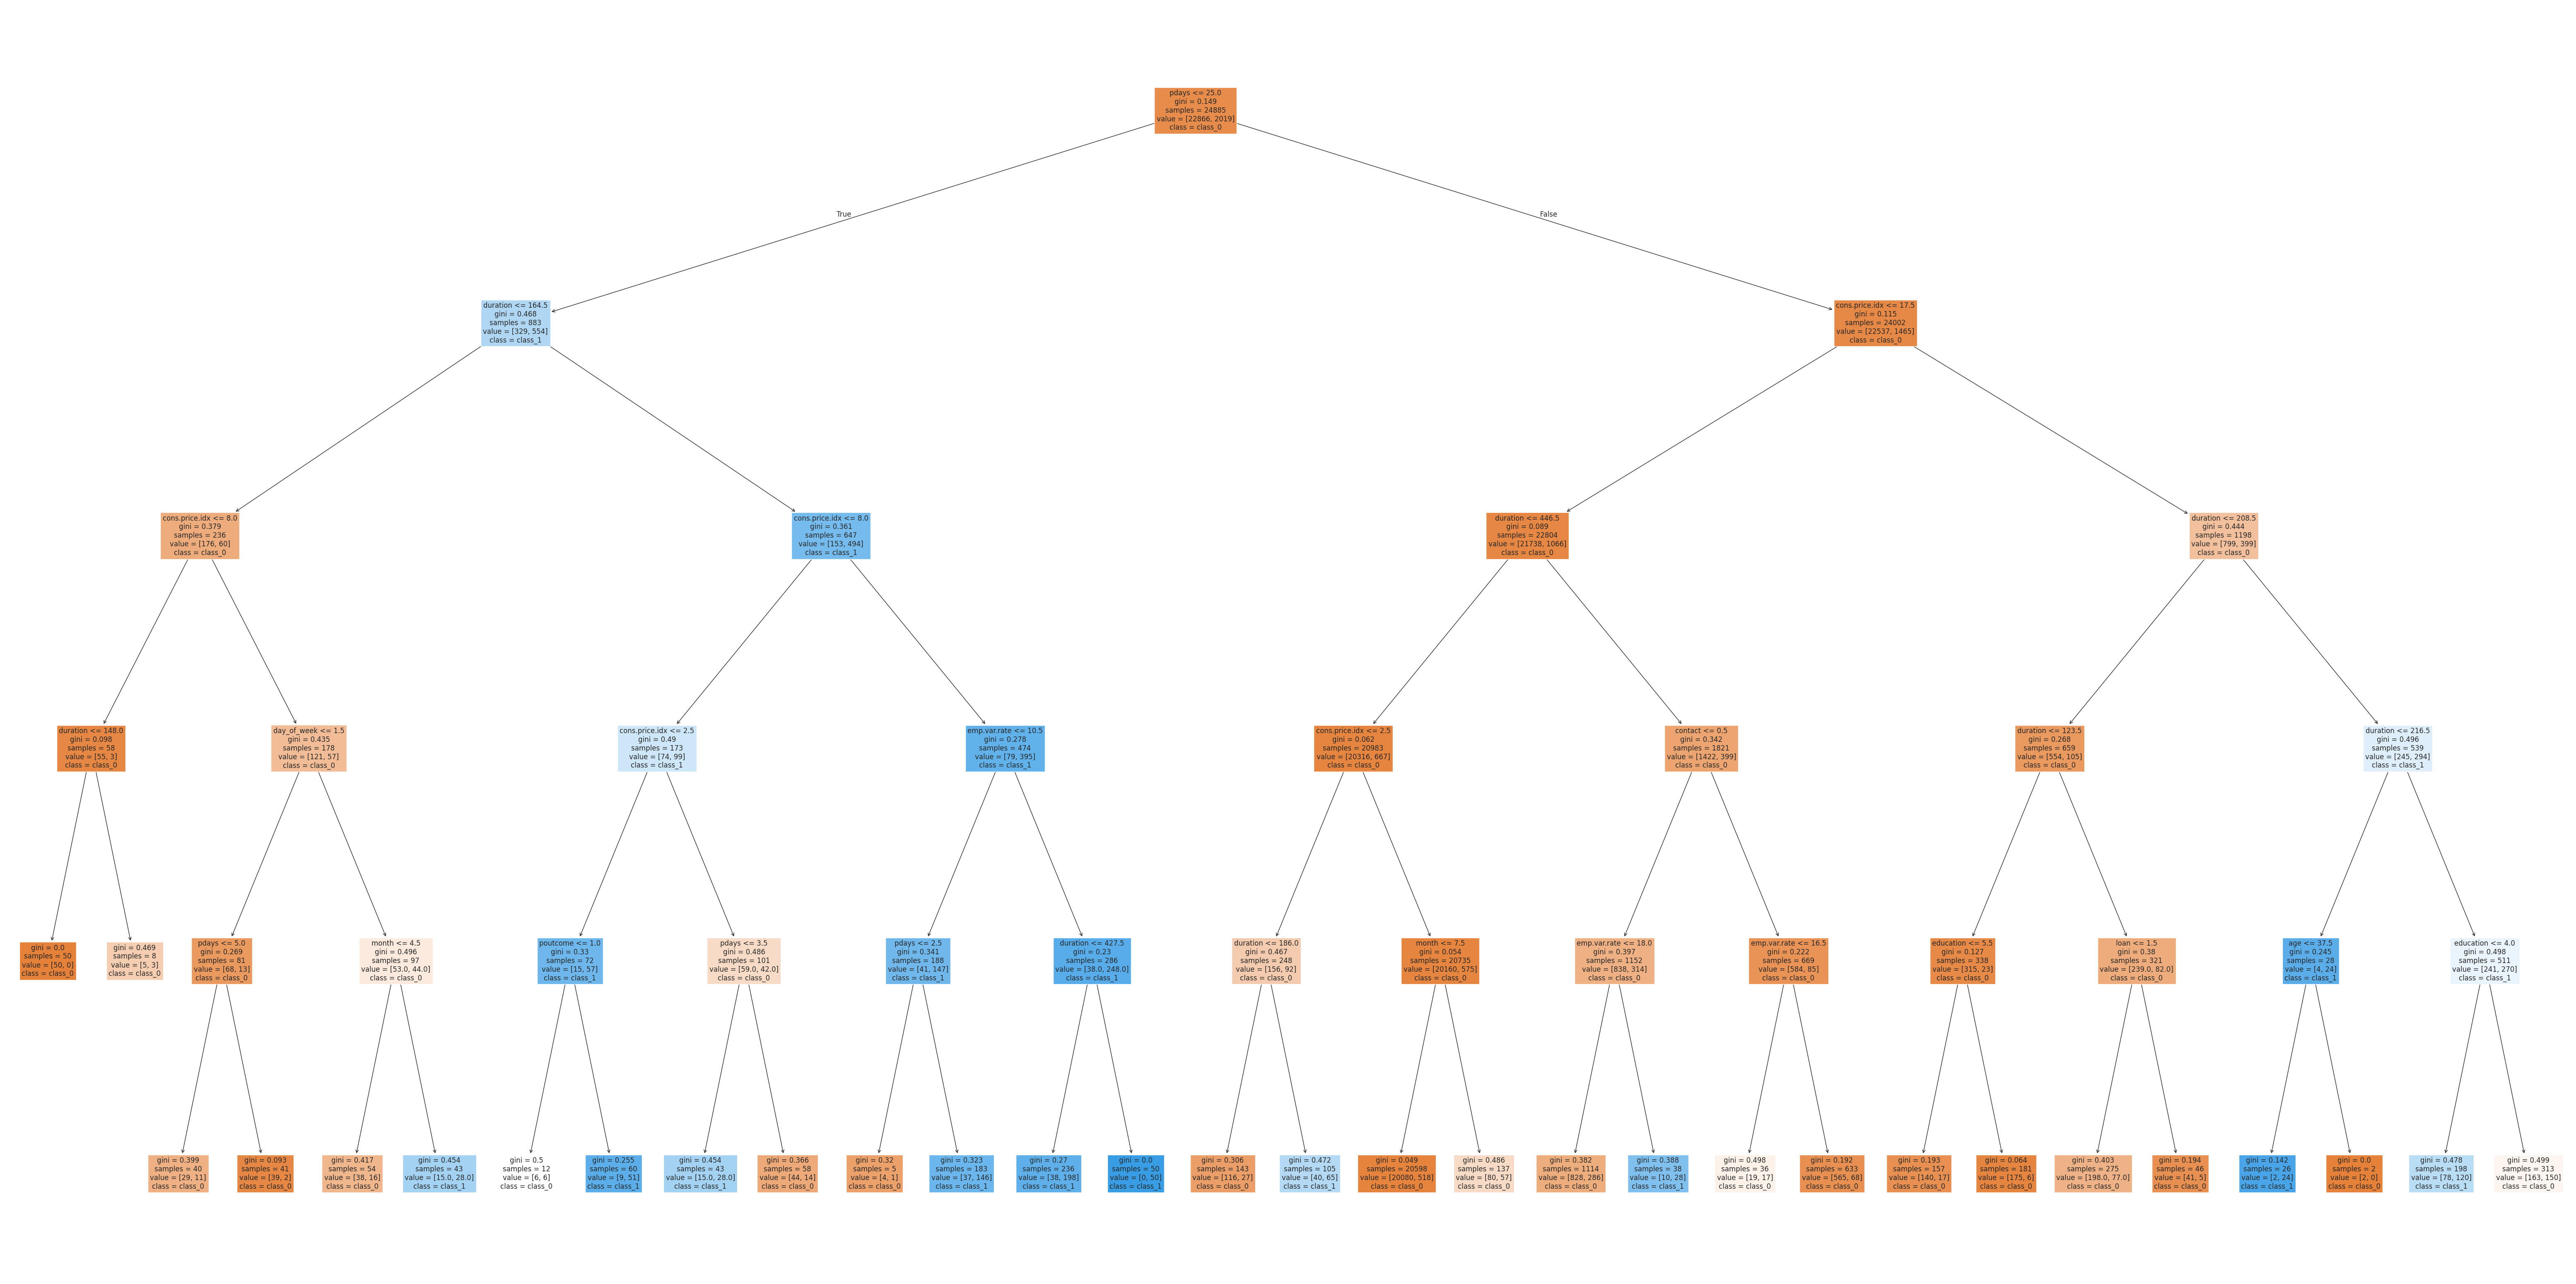

In [ ]:
# ------------------------------------------------------------
# Visualize the trained Decision Tree
# ------------------------------------------------------------

# Get all feature names from the dataframe
feature_names = df.columns.tolist()

# Define class names for the target variable
class_names = ["class_0", "class_1"]

# Create a large figure for better readability
plt.figure(figsize=(80, 40))

# Plot the Decision Tree
# - filled=True → colors nodes by class for better visualization
# - fontsize=12 → readable text size
plot_tree(
    dc,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    fontsize=12
)

# Display the plot
plt.show()


## Decision Tree classifier

### using 'entropy' criterion

In [ ]:
# ------------------------------------------------------------
# Initialize and train a Decision Tree Classifier
# ------------------------------------------------------------

# Parameters:
# - criterion='entropy'       → uses Information Gain to evaluate splits
# - max_depth=5               → limits tree depth to prevent overfitting
# - min_samples_split=10      → minimum samples required to split a node
# - random_state=1            → ensures reproducible results
dc1 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=10,
    random_state=1
)

# Train the model on the training dataset
dc1.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=1)

## Evaluating Training and Testing Accuracy

In [ ]:
# ------------------------------------------------------------
# Evaluate the trained Decision Tree (dc1) performance
# ------------------------------------------------------------

# Training accuracy: how well the model fits the training data
print("Training Accuracy:", dc1.score(x_train, y_train))

# Testing accuracy: how well the model generalizes to unseen data
print("Testing Accuracy:", dc1.score(x_test, y_test))


Training Accuracy: 0.9369097850110508
Testing Accuracy: 0.9293014533520862


In [ ]:
# ------------------------------------------------------------
# Generate predictions for the test dataset using the trained Decision Tree (dc1)
# ------------------------------------------------------------

y1_pred = dc1.predict(x_test)

# y1_pred contains the predicted class labels for the test data


## Evaluating Prediction Accuracy

In [ ]:
# ------------------------------------------------------------
# Calculate and print the accuracy of the Decision Tree (dc1) on the test dataset
# ------------------------------------------------------------

# Accuracy = (Number of correct predictions) / (Total predictions)
test_accuracy = accuracy_score(y_test, y1_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9293014533520862


In [ ]:
# ------------------------------------------------------------
# Compute and display the confusion matrix for the test predictions of dc1
# ------------------------------------------------------------

# Rows represent actual classes, columns represent predicted classes
# Format:
#                Predicted
#               0       1
# Actual 0   TN      FP
# Actual 1   FN      TP
cm = confusion_matrix(y_test, y1_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[9672  128]
 [ 626  239]]


In [ ]:
# ------------------------------------------------------------
# Generate a detailed classification report for the test predictions of dc1
# ------------------------------------------------------------
# Includes:
# - Precision: proportion of correctly predicted positives out of all predicted positives
# - Recall: proportion of correctly predicted positives out of all actual positives
# - F1-score: harmonic mean of precision and recall
# - Support: number of actual occurrences of each class
report = classification_report(y_test, y1_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      9800
           1       0.65      0.28      0.39       865

    accuracy                           0.93     10665
   macro avg       0.80      0.63      0.68     10665
weighted avg       0.92      0.93      0.92     10665



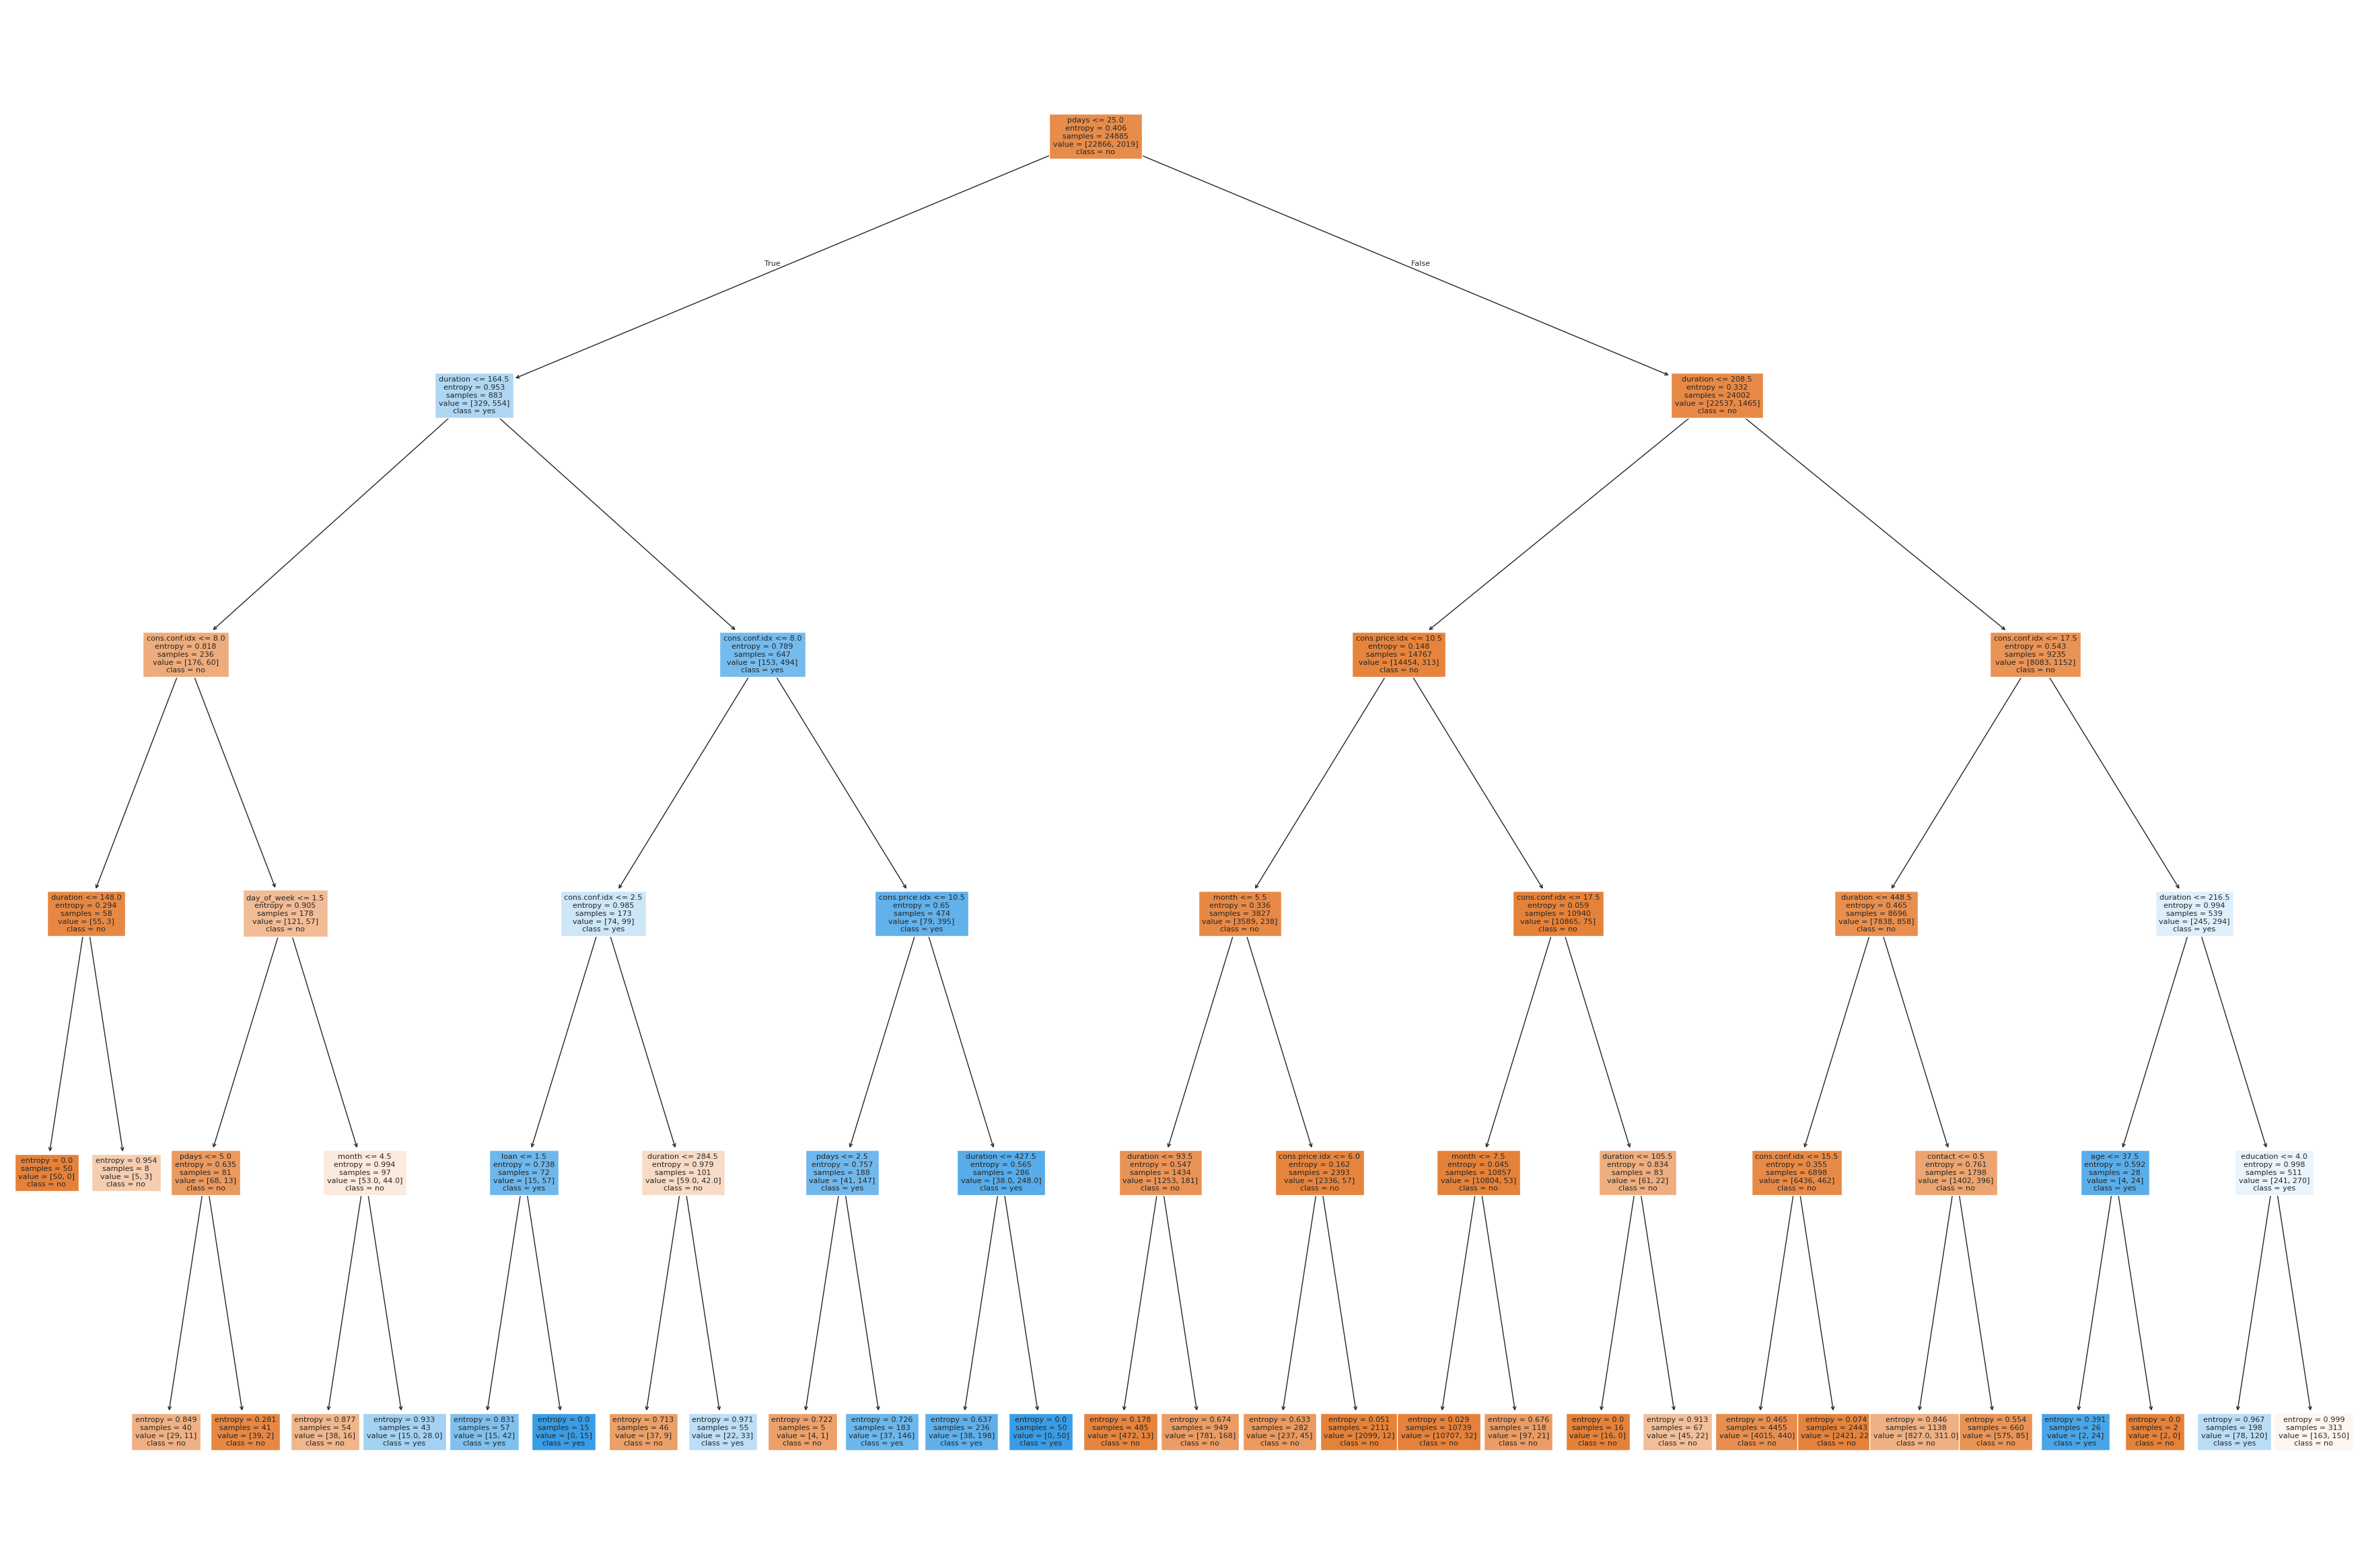

In [ ]:
# ------------------------------------------------------------
# Visualize the trained Decision Tree (dc1)
# ------------------------------------------------------------

# Class names for the target variable
class_names = ['no', 'yes']

# Feature names from training dataset
feature_names = x_train.columns.tolist()

# Create a large figure to reduce overlapping nodes
plt.figure(figsize=(45, 30))  # Wider and taller figure for clarity

# Plot the Decision Tree
# - filled=True → color nodes by class
# - fontsize=8 → smaller font prevents overlapping
# - max_depth=None → shows full tree; can limit depth to top levels if needed
plot_tree(
    dc1,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    fontsize=8,
    max_depth=None  # Optional: limit depth to top levels to improve readability
)

# Display the plot
plt.show()


## Final Conclusion :-

- **Overall Model Performance :**

  Both Gini impurity and Entropy criteria yield consistently high performance, achieving around 93–94% accuracy on both training and testing datasets. This indicates that the Decision Tree model generalizes well and is not overfitting.

- **Comparison Between Criteria :**

  Gini Criterion: Demonstrates slightly better testing accuracy and recall for the positive class (1), making it more effective at correctly identifying clients who are likely to subscribe to a term deposit.

- **Entropy Criterion :**
  
   Produces marginally fewer false positives, but slightly more false negatives, meaning it is more conservative in predicting positive outcomes.

- **Key Insight :**

  The Gini-based model provides a better balance between accuracy and recall, making it the preferred choice for identifying potential subscribers while maintaining overall prediction reliability.

# Thank You !!!